# Classification Model

in this last notebook course we will find the best classification model with the defaul_carte dataset [link of the course](https://openclassrooms.com/en/courses/5873596-design-effective-statistical-models-to-understand-your-data/6233091-evaluate-classification-models)

In [2]:
import statsmodels.formula.api as smf
import pandas as pd

df = pd.read_csv('data/credit_default_sampled.csv')
model = smf.logit('default ~ income + balance + student', data = df)
results = model.fit()
results.pred_table()

Optimization terminated successfully.
         Current function value: 0.245965
         Iterations 8


array([[461.,  39.],
       [ 41., 292.]])

In [4]:
df.default.value_counts()

0    500
1    333
Name: default, dtype: int64

In [6]:
accuracy=(results.pred_table()[0][0]+results.pred_table()[1][1])/(500 + 333)
accuracy

0.9039615846338536

## Accuracy=90% pretty good score niceeeeee

# Introducing ROC and AUC 
We used the scikit-learn library to obtain the true positive rate and false positive rate:

Text(0.5, 1.0, 'ROC')

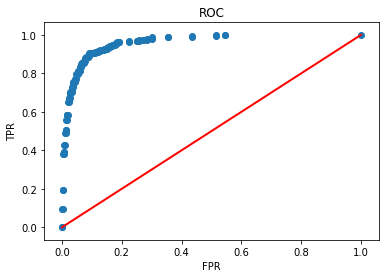

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
yhat= results.predict()
false_positive_rate, true_positive_rate, thresholds = roc_curve(df['default'], yhat)
plt.scatter(false_positive_rate,true_positive_rate)
plt.plot([0.0, 1.0], [0.0, 1.0], 'r-', lw=2) # Red straight line
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")

# AUC

In [17]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(df["default"], yhat)
score

0.9616516516516517